# Understanding Clustering (K-means)
The following exercises illustrate a clustering task using K-means clustering in a 2-dimensional space. We will not look at the theory of K-means clustering; we will just use it as a black box in order to understand some fundamental concepts of segmentation and clustering. So this is a tutorial without mathematics or analysis.
Now its important to realise that in data science you will rarely use a simple 2-dimensional modelling. However, the simple nature of the material means we can carefully study the different aspects of learning. So this is excellent material for a tutorial. The material for this tutorial has been provided from this [link](https://www.datascience.com/blog/introduction-to-k-means-clustering-algorithm-learn-data-science-tutorials)
 
# K-means Clustering
The goal in K-means clustering is to find K subgroups in a given dataset. Please note the variable K represents the number of subgroups in the data. K-means assigns each data point in the dataset to one of the K subgroups iteratively based on the variables (features) in the dataset.

The output of the K-means clustering are:

1. K cluster centers. The centers can be used to find the relevant subgroup for a new data point.

2. Labels for all data points in the given dataset.


**Input dataset:** [Delivery fleet driver data](https://www.datascience.com/blog/introduction-to-k-means-clustering-algorithm-learn-data-science-tutorials)

Please download the csv file of the dataset from Moodle. There are three variables (features) in this dataset:

1. Driver_ID: ID of a driver.

2. Distance_Feature: Mean distance driven per day.

3. Speeding_Feature: Mean percentage of time a driver was >5 mph over the speed limit.

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# This is a library we import to run the K-means clustering algorithm as a blackbox
# For more information please see: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans


In [35]:
# Load the dataset on Moodle
df = pd.read_csv('Drivers.csv')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [36]:
# Check the dataset dimension
df.shape

(4000, 3)

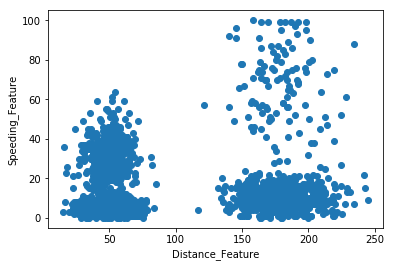

In [37]:
#Visualise the dataset (Distance vs Speeding)
%matplotlib inline
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'])
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

In [38]:
# Run the K-means clustering over the dataset using only distance and speeding features
# Set K=2: we only want to cluster the dataset into two subgroups
kmeans = KMeans(n_clusters=2).fit(df[['Distance_Feature','Speeding_Feature']])

In [39]:
# Look at the outputs: Two cluster centers
kmeans.cluster_centers_

array([[  50.04763438,    8.82875   ],
       [ 180.017075  ,   18.29      ]])

In [40]:
# Look at the outputs: Cluster labels 
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

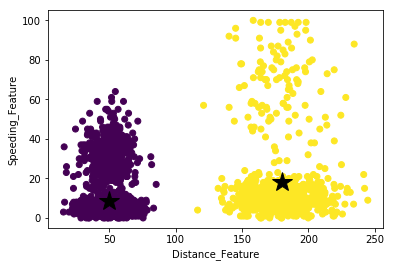

In [41]:
# Visualise the output labels
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'], c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

What type of drivers does each subgroup represent? 

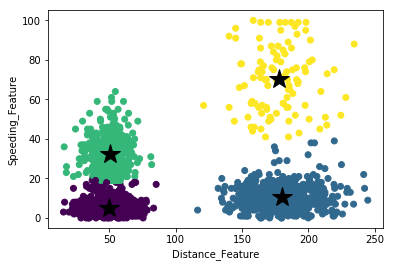

In [42]:
# Run K-means with another K value
# Set K=4: we want to cluster the dataset into four subgroups
kmeans2 = KMeans(n_clusters=4).fit(df[['Distance_Feature','Speeding_Feature']])

# Visualise the output labels
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'], c=kmeans2.labels_)

# Visualise the cluster centers (black stars)
plt.plot(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],'k*',markersize=20)

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

What type of drivers does each subgroup represent? 

**K-means initialization:**
try adding init='random' to the code like this: 

kmeans2 = KMeans(n_clusters=4, init='random').fit(df[['Distance_Feature','Speeding_Feature']])

and run it multiple times. Does the clustering change? Why?

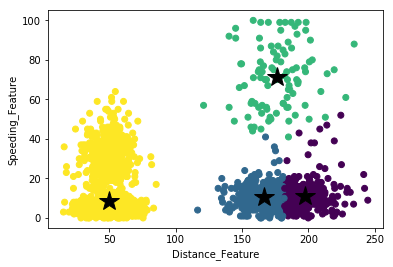

In [43]:
kmeans2 = KMeans(n_clusters=4, init='random').fit(df[['Distance_Feature','Speeding_Feature']])
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'], c=kmeans2.labels_)

# Visualise the cluster centers (black stars)
plt.plot(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],'k*',markersize=20)

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()